In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### View the data

In [2]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


### Clean the data

In [3]:
df.columns = ['city', 'population', 'violent', 'murder', 'rape1', 'rape2', 'robbery', 
              'ag_aslt', 'property', 'burglary', 'larce-th', 'motor_th', 'arson3']

df.head()

,city,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


### Let's see if there is any relationship

Check to see if murders or robberies relate to property at all

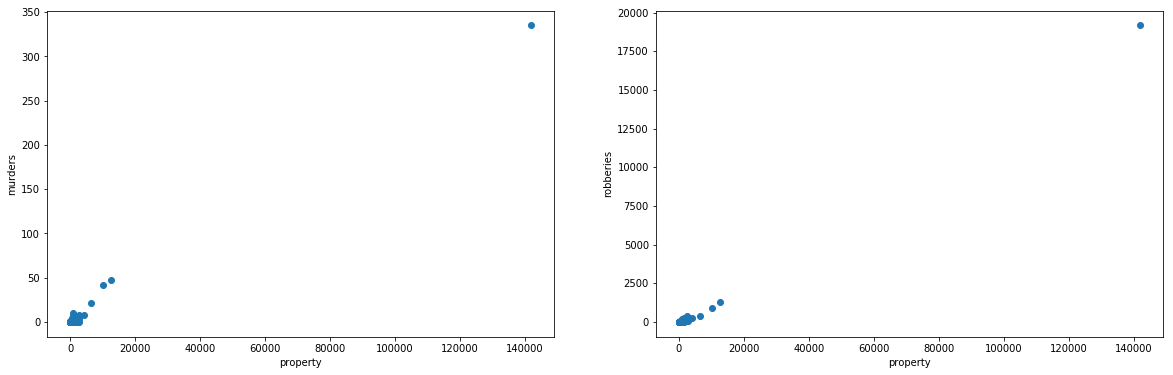

In [4]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.scatter(x='property', y='murder', data=df)
plt.xlabel('property')
plt.ylabel('murders')
plt.subplot(1,2,2)
plt.scatter(x='property', y='robbery', data=df)
plt.xlabel('property')
plt.ylabel('robberies')
plt.show()

### Let's remove some outliers

In [5]:
df.sort_values('population', ascending=False).head()

,city,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
216,New York,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,nan
35,Buffalo,258789.000,3249.000,47.000,nan,145.000,1322.000,1735.000,12491.000,3458.000,8076.000,957.000,nan
272,Rochester,210562.000,2107.000,42.000,nan,92.000,918.000,1055.000,10051.000,2587.000,6855.000,609.000,132.000
346,Yonkers,199134.000,1036.000,6.000,nan,25.000,390.000,615.000,2368.000,470.000,1662.000,236.000,10.000
310,Syracuse,143834.000,1192.000,21.000,nan,75.000,400.000,696.000,6473.000,1781.000,4298.000,394.000,57.000


In [6]:
df.describe()

,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [7]:
df = df.drop(216)

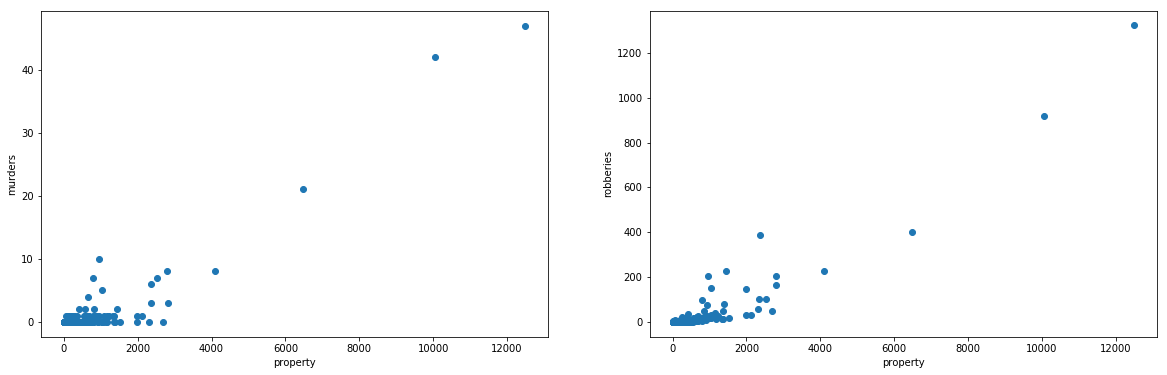

In [8]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.scatter(x='property', y='murder', data=df)
plt.xlabel('property')
plt.ylabel('murders')
plt.subplot(1,2,2)
plt.scatter(x='property', y='robbery', data=df)
plt.xlabel('property')
plt.ylabel('robberies')
plt.show()

### Drop even more outliers

In [9]:
df = df.drop(35)

In [10]:
df = df.drop(272)

In [11]:
df = df.drop(346)

In [12]:
df = df.drop(310)

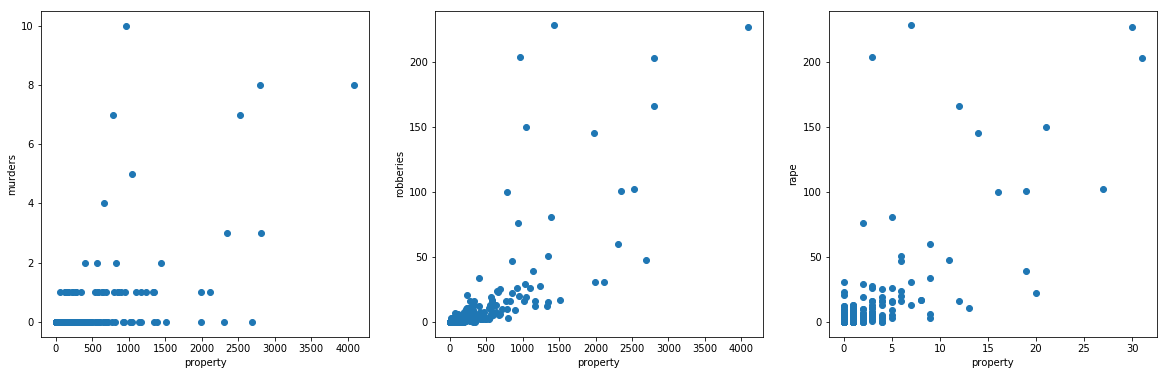

In [13]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.scatter(x='property', y='murder', data=df)
plt.xlabel('property')
plt.ylabel('murders')
plt.subplot(1,3,2)
plt.scatter(x='property', y='robbery', data=df)
plt.xlabel('property')
plt.ylabel('robberies')
plt.subplot(1,3,3)
plt.scatter(x='rape2', y='robbery', data=df)
plt.xlabel('property')
plt.ylabel('rape')
plt.show()

In [14]:
df.loc[df['property']>3500]

,city,population,violent,murder,rape1,rape2,robbery,ag_aslt,property,burglary,larce-th,motor_th,arson3
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan


In [15]:
df = df.drop(3)

### Let's see if we can find a linear relationship in some other features

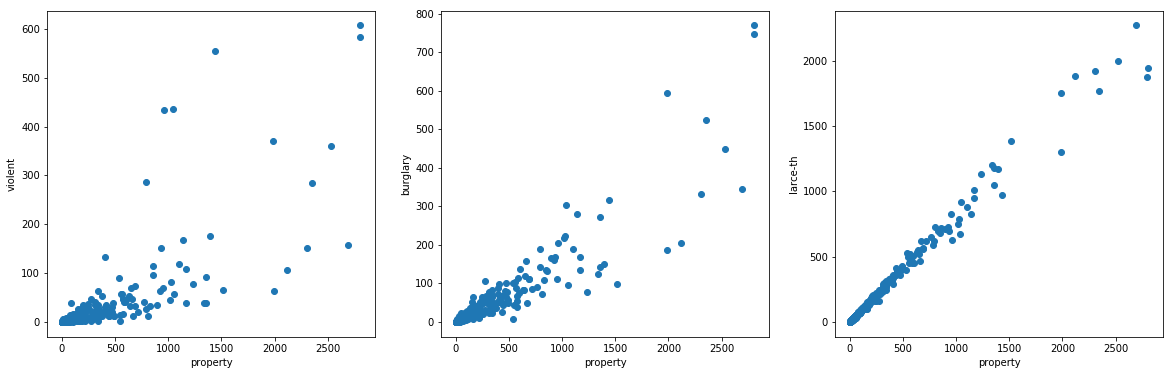

In [16]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.scatter(x='property', y='violent', data=df)
plt.xlabel('property')
plt.ylabel('violent')
plt.subplot(1,3,2)
plt.scatter(x='property', y='burglary', data=df)
plt.xlabel('property')
plt.ylabel('burglary')
plt.subplot(1,3,3)
plt.scatter(x='property', y='larce-th', data=df)
plt.xlabel('property')
plt.ylabel('larce-th')
plt.show()

In [17]:
df.columns

Index(['city', 'population', 'violent', 'murder', 'rape1', 'rape2', 'robbery',
       'ag_aslt', 'property', 'burglary', 'larce-th', 'motor_th', 'arson3'],
      dtype='object')

In [18]:
df2 = df[['population','murder','robbery', 'property', 'violent', 'burglary', 'larce-th', 'ag_aslt', 'rape2']].dropna()


df2['population^2'] = df2['population'] * df2['population']

df2['murder'] = df2.loc[df2['murder']>0, 'murder'] = 1

df2['robbery'] = df2.loc[df2['robbery']>0, 'robbery'] = 1


df2.describe()

,population,murder,robbery,property,violent,burglary,larce-th,ag_aslt,rape2,population^2
count,342.000,342.000,342.000,342.000,342.000,342.000,342.000,342.000,342.000,342.000
mean,13528.348,1.000,1.000,287.670,27.474,46.909,232.798,16.974,1.643,470294375.652
std,16974.117,0.000,0.000,460.277,74.971,90.645,365.363,45.015,3.768,1329035238.060
min,526.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000
25%,2979.750,1.000,1.000,39.000,2.000,6.000,31.000,1.000,0.000,8878919.250
50%,7074.500,1.000,1.000,111.000,6.000,17.000,92.000,4.000,0.000,50049200.500
75%,17611.250,1.000,1.000,331.750,20.000,49.000,272.500,13.000,2.000,310156870.750
max,118296.000,1.000,1.000,2807.000,607.000,769.000,2271.000,403.000,31.000,13993943616.000


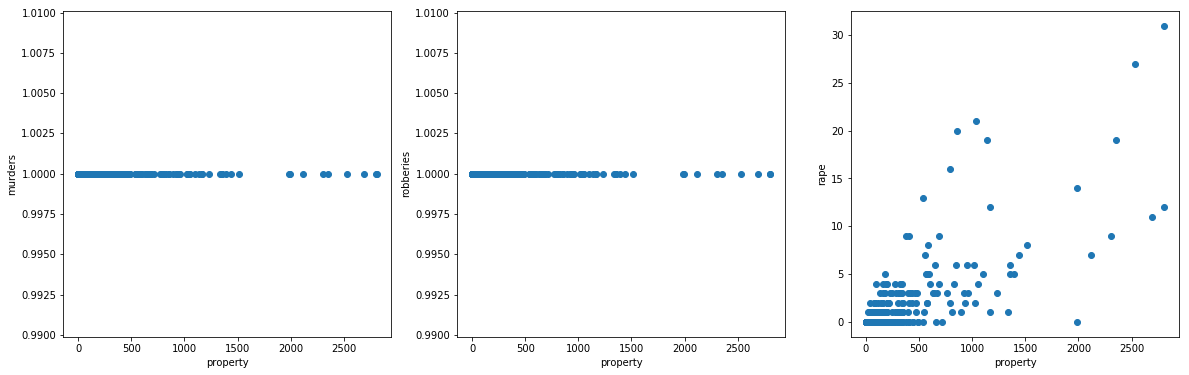

In [19]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.scatter(x='property', y='murder', data=df2)
plt.xlabel('property')
plt.ylabel('murders')
plt.subplot(1,3,2)
plt.scatter(x='property', y='robbery', data=df2)
plt.xlabel('property')
plt.ylabel('robberies')
plt.subplot(1,3,3)
plt.scatter(x='property', y='rape2', data=df2)
plt.xlabel('property')
plt.ylabel('rape')
plt.show()

### Apply some PCA to combine

Based on the data, rape, murder and robberies happen less often and seem to have a less linear relationship to property. Let's combine them together to see if we can still use these features.

In [20]:
from sklearn.preprocessing import StandardScaler
features = ['murder', 'robbery', 'rape2', 'ag_aslt']

# Separating out the features
x = df2.loc[:, features].values
# Separating out the target
y = df2.loc[:,['property']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1'])

In [26]:
model_df = pd.concat([principalDf, df2], axis = 1).dropna().reset_index()
model_df.head()

,index,pc1,population,murder,robbery,property,violent,burglary,larce-th,ag_aslt,rape2,population^2
0,0,-0.576,1861.000,1.000,1.000,12.000,0.000,2.000,10.000,0.000,0.000,3463321.000
1,1,-0.529,2577.000,1.000,1.000,24.000,3.000,3.000,20.000,3.000,0.000,6640929.000
2,2,-0.529,2846.000,1.000,1.000,16.000,3.000,1.000,15.000,3.000,0.000,8099716.000
3,4,-0.544,6388.000,1.000,1.000,223.000,23.000,53.000,165.000,16.000,3.000,40806544.000
4,5,-0.529,4089.000,1.000,1.000,46.000,5.000,10.000,36.000,2.000,0.000,16719921.000


In [27]:
pca.explained_variance_ratio_

array([0.88857711])

### Model using murder, robbery and rape as features

Our original idea was to use these three, let's see how they work.

In [36]:
# to split a training and test sample
from sklearn.model_selection import train_test_split

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = model_df['property'].values.reshape(-1, 1)
X = model_df[['murder','robbery','rape2','population^2']]
regr.fit(X, Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x_train, y_train))


Coefficients: 
 [[0.00000000e+00 2.23666040e-07 6.29198984e+01 1.82014846e-07]]

Intercept: 
 [97.94224394]

R-squared:
0.8163930892992556


The R score is decent but the intercept is much too high.

### Try with some different features & add the PCA in

In [29]:
# to split a training and test sample
from sklearn.model_selection import train_test_split

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = model_df['property'].values.reshape(-1, 1)
X = model_df[['pc1','burglary', 'violent', 'larce-th', 'population^2']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)
regr.fit(x_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x_train, y_train))


Coefficients: 
 [[-1.69472147e-02  1.00766739e+00  1.78608643e-01  9.99422662e-01
   5.05703359e-09]]

Intercept: 
 [0.52200825]

R-squared:
0.999804301845443


This second set performs much better than the first set. With a very very high R score, and an intercept that makes much more sense. My main fear with it though is that with such a high R Score, the model might be overfitting a bit.

### Check for Multivarate Normality

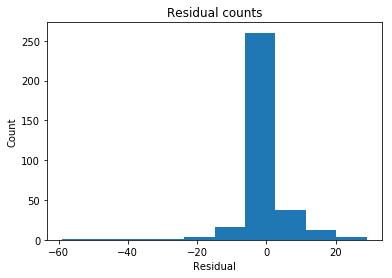

In [30]:
# find predicted values
predicted = regr.predict(X).ravel()
actual = model_df['property']

# Calculate the error, also called the residual.
residual = actual - predicted

# plot
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Homoscedasticity

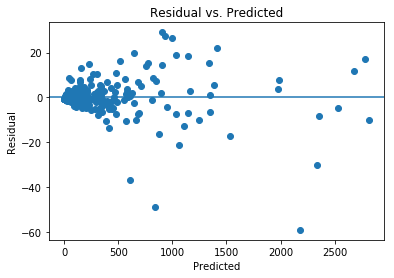

In [31]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

### Transform the data to normalize it

Lets see if this can fix the Homoscedasticity

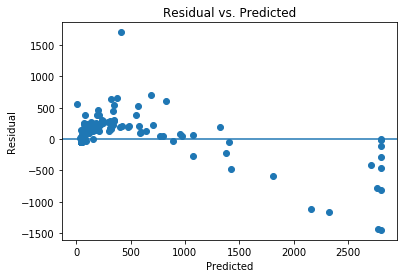

In [32]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression

transformer = QuantileTransformer(output_distribution='normal')
regressor = LinearRegression()
regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)
regr.fit(x_train, y_train)

# find predicted values
predicted = regr.predict(X).ravel()
actual = model_df['property']

# Calculate the error, also called the residual.
residual = actual - predicted

# plot
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Transforming the data did not seem to help

### Testing the model on the training & test set

My fears of the model possibly overfitting were unwarranted. The model performs similarly well on both the training and the test set.

In [33]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x_train, y_train))


Coefficients: 
 [[-1.69472147e-02  1.00766739e+00  1.78608643e-01  9.99422662e-01
   5.05703359e-09]]

Intercept: 
 [0.52200825]

R-squared:
0.999804301845443


In [34]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(x_test, y_test))


Coefficients: 
 [[-1.69472147e-02  1.00766739e+00  1.78608643e-01  9.99422662e-01
   5.05703359e-09]]

Intercept: 
 [0.52200825]

R-squared:
0.9995772422723787


### Looking at the correlations

It looks as if the four non-PCA'd features are highly correlated. Which means we might be better off doing another round of PCA to combine them into a feature.

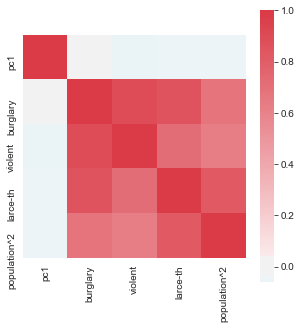

In [35]:
sns.set_style("darkgrid")
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(x_train.corr(), square=True, cmap=cmap, center=0)
plt.show()